## Ice Temperature (icetemp) Analysis

Analyzing thermistor data from South Pole neutrino experiments during the time period 2002 - 2010

In [1]:
# Standard imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Imports from ice temperature estimation package
import icetemp
import icetemp.data_io as io
import icetemp.model as m

____
# Inference on all years, least-squares regression, polynomial fits

## Quadratic fit


Best fit values for real data of 2002:
b = -46.2 ± 0.201
m = -0.00849 ± 0.000257
q = 8.07e-06 ± 8.09e-08

Best fit values for real data of 2007:
b = -19.9 ± 12.9
m = -0.0336 ± 0.0114
q = 1.41e-05 ± 2.5e-06

Best fit values for real data of 2009:
b = -17.9 ± 12.9
m = -0.0353 ± 0.0114
q = 1.45e-05 ± 2.5e-06

Best fit values for real data of 2010:
b = -11.6 ± 12.9
m = -0.041 ± 0.0114
q = 1.58e-05 ± 2.5e-06


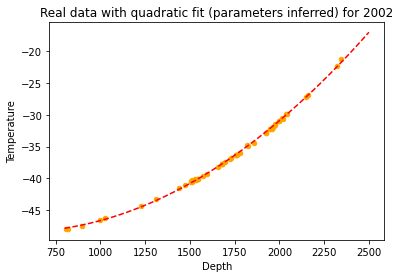

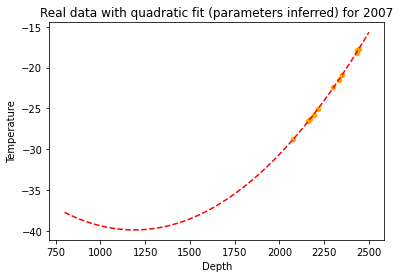

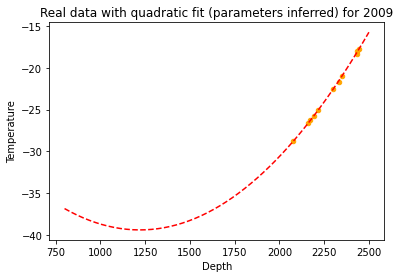

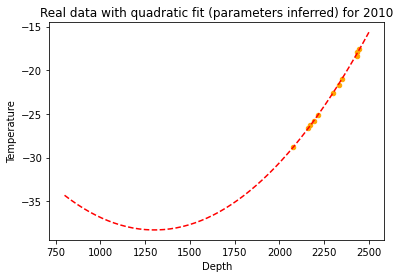

In [2]:
# load real data
data_2002 = io.load_ice_data("amanda_temp.txt", data_year=2002,temp_errors=0.1, depth_errors=2) 
data_2007 = io.load_ice_data("icecube_temp.2007.txt", data_year=2007,temp_errors=0.1, depth_errors=2)
data_2009 = io.load_ice_data("icecube_temp.2009.txt", data_year=2009,temp_errors=0.1, depth_errors=2)
data_2010 = io.load_ice_data("icecube_temp.2010.txt", data_year=2010,temp_errors=0.1, depth_errors=2)

data = [data_2002, data_2007, data_2009, data_2010]
x = np.linspace(800,2500)


for year in range(len(data)):
    params, cov_mat = m.fit_quad(data[year])

    # print formatting function adapted from HW 6 solutions
    uncertainties = np.sqrt(np.diag(cov_mat))
    print("\nBest fit values for real data of {}:".format(data[year]['data_year'][0]))
    for value, sigma, name in zip(params, uncertainties, 'bmq'):
        print('{} = {:.3} ± {:.3}'.format(name, value, sigma))

    x.sort()    
    data[year].plot(x='Depth', y='Temperature', kind='scatter', yerr=0.1,color='orange')
    plt.plot(x, params[2]*x**2 + params[1]*x + params[0], linestyle='dashed', color='red')
    plt.title("Real data with quadratic fit (parameters inferred) for {}".format(data[year]['data_year'][0]))

____
# Inference on all years, MCMC

## Quadratic fit

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [q, b, m]


Sampling 2 chains for 2_000 tune and 2_500 draw iterations (4_000 + 5_000 draws total) took 31 seconds.
The acceptance probability does not match the target. It is 0.8887457938971899, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


Paremters from MCMC for the year 2002
[-4.6208102e+01 -8.4890240e-03  8.0650000e-06]


/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [q, b, m]
/usr/local/lib/python3.9/site-packages/pymc3/distributions/transforms.py:294: RuntimeWarning: invalid value encountered in log
  return floatX(np.log(x - a) - np.log(b - x))


Sampling 2 chains for 2_000 tune and 2_500 draw iterations (4_000 + 5_000 draws total) took 156 seconds.
There were 1395 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5637374748454471, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Paremters from MCMC for the year 2007
[-2.2979302e+01 -3.0853181e-02  1.3507000e-05]


/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [q, b, m]


Sampling 2 chains for 2_000 tune and 2_500 draw iterations (4_000 + 5_000 draws total) took 165 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9054831460908727, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


Paremters from MCMC for the year 2009
[-1.65593392e+01 -3.64526480e-02  1.47150000e-05]


/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [q, b, m]


Sampling 2 chains for 2_000 tune and 2_500 draw iterations (4_000 + 5_000 draws total) took 175 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 752 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.27776566768743766, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Paremters from MCMC for the year 2010
[-1.37198192e+01 -3.90431680e-02  1.53020000e-05]


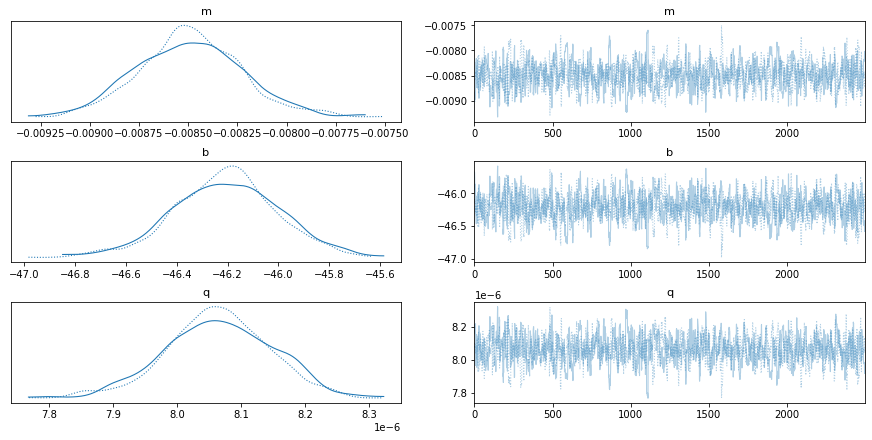

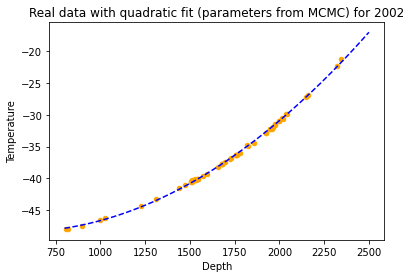

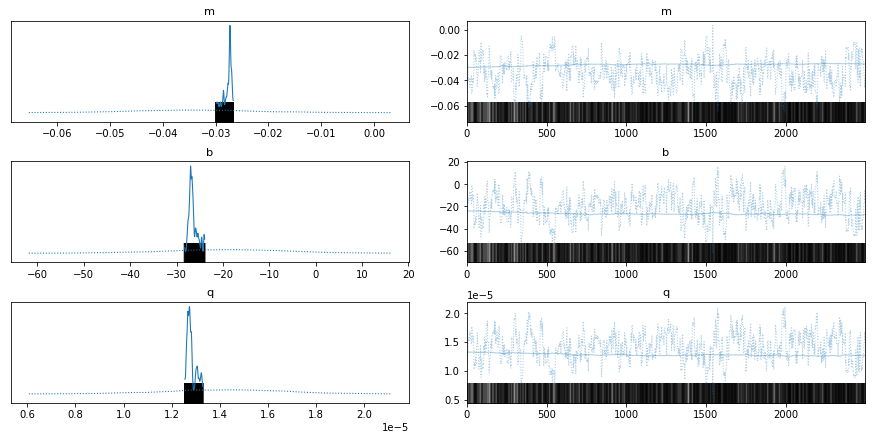

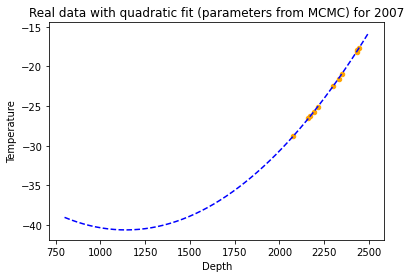

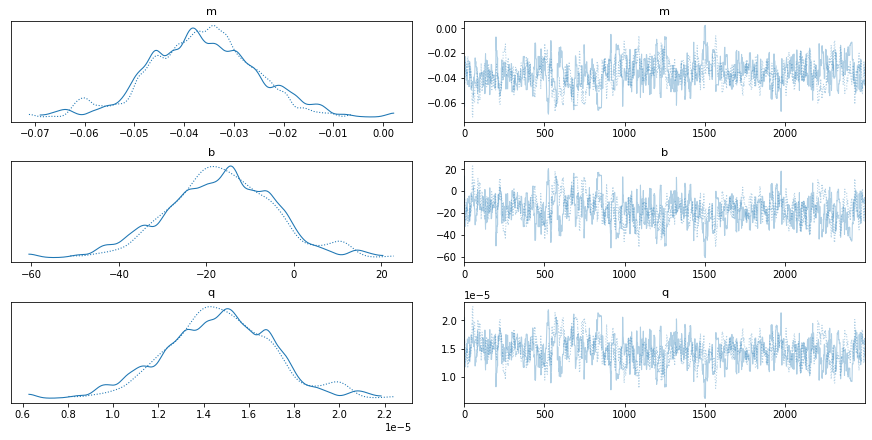

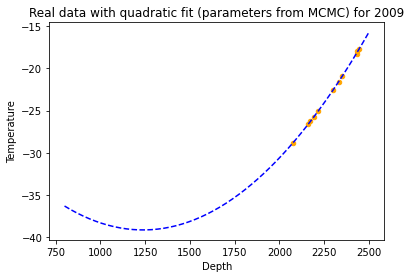

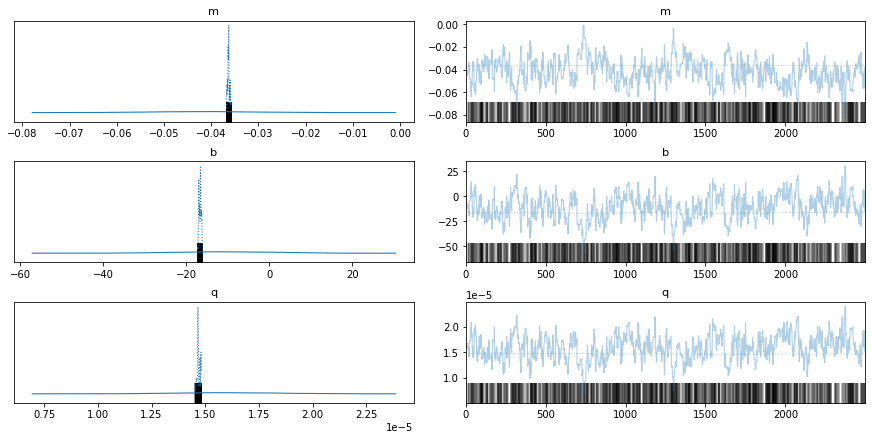

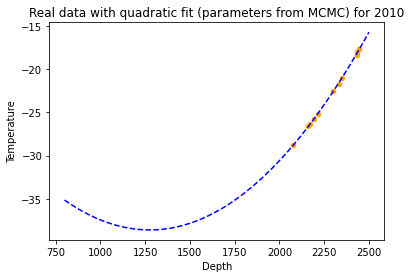

In [7]:
#MCMC on real data
init_guess_all = [{'b':-40, 'm':-0.0009, 'q':8.07e-06},
                  {'b':-20, 'm':-0.0336, 'q':1.41e-05},
                  {'b':-18, 'm':-0.0353, 'q':1.45e-05},
                  {'b':-12, 'm':-0.0410, 'q':1.58e-05}] #based on the results from the algebraic fit of all datasets (see above)
year_list = []
temp_list = []
pred_errs_list = []
for year in range(len(data)):
    params, errors = m.fit_quad_MCMC(data[year], init_guess_all[year]) # returns params in order b, m, q
    print("Paremters from MCMC for the year {}".format(data[year]['data_year'][0]))
    print(params)
    
    year_list.append(data[year]['data_year'][0])
    temp_list.append(params[0])
    pred_errs_list.append(errors[0])
    
    data[year].plot(x='Depth', y='Temperature', kind='scatter', yerr=0.1,color='orange')
    plt.plot(x, params[2]*x**2 + params[1]*x + params[0], linestyle='dashed', color='blue')
    plt.title("Real data with quadratic fit (parameters from MCMC) for {}".format(data[year]['data_year'][0]))

## MCMC, generalized 

In [ ]:
n = 2
init_guess_all = [{'C_0':-40, 'C_1':-0.0009, 'C_2':8.07e-06},
                  {'C_0':-20, 'C_1':-0.0336, 'C_2':1.41e-05},
                  {'C_0':-18, 'C_1':-0.0353, 'C_2':1.45e-05},
                  {'C_0':-12, 'C_1':-0.0410, 'C_2':1.58e-05}] #based on the results from the algebraic fit of all datasets (see above)
timetable_poly_2 = m.get_timetable(n, data, init_guess_all)

In [ ]:
n = 3
timetable_poly_3 = m.get_timetable(n, data)

In [ ]:
n = 4
timetable_poly_4 = m.get_timetable(n, data)

In [ ]:
n = 5
timetable_poly_5 = m.get_timetable(n, data)

In [ ]:
n = 6
timetable_poly_6 = m.get_timetable(n, data)

## Odds ratio using MCMC models

In [ ]:
# range of depth locations
from scipy import stats

data = [data_2002]
n_M1 = 1
n_M2 = 2
x = np.linspace(800,2500)
sigma_y = [data[0]['temp_errors'][0]] * len(x)

for year in range(len(data)):
    
    params1, errors1 = m.n_polyfit_MCMC(n_M1, data[year]) # returns params in order C_0, C_1, C_2,...
    params2, errors2 = m.n_polyfit_MCMC(n_M2, data[year]) # returns params in order C_0, C_1, C_2,...

    print('params1', params1,'\n', 'params2', params2)

In [ ]:
mu1 = np.mean(np.sum([params1[i] * x**i for i in range(n_M1+1)], axis = 0))
mu2 = np.mean(np.sum([params2[i] * x**i for i in range(n_M2+1)], axis = 0))

print('mu1', mu1,'\n', 'mu2', mu2)

temps = np.linspace(-60,-10)
like1 = stats.norm.pdf(temps, mu1, sigma_y)
like2 = stats.norm.pdf(temps, mu2, sigma_y)

print('like1', like1,'\n', 'like2', like2)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(temps, like1,'r-')
ax2.plot(temps, like2,'b-')

00
\
odds_ratio = like1/like2
print(odds_ratio)

____
# After inferring temperature at ground level, use GPR

In [ ]:
print(timetable_poly_2)

plt.errorbar(timetable_poly_2['year'], timetable_poly_2['temperature'], fmt='ro', yerr=timetable_poly_2['prediction_errors'])
plt.ylabel('Ground Level Temperature [ºC]')
plt.xlabel('Year')

In [ ]:
print(timetable_poly_3)

plt.errorbar(timetable_poly_3['year'], timetable_poly_3['temperature'], fmt='ro', yerr=timetable_poly_3['prediction_errors'])
plt.ylabel('Ground Level Temperature [ºC]')
plt.xlabel('Year')